Trabalho 1

In [206]:
from metodos import rk4

import numpy as np
import matplotlib.pyplot as plt

$\dot C = -e^{-\frac{10}{T+273}}*C$ 

$\dot T = 1000 * e^{-\frac{10}{T+273}}*C - 10 * (T-20)$ 

Sistema de equações

In [207]:
def sistema(x, t):
        f1, f2 = x
        dx1dt = -np.exp((-10)/(f2+273))*f1
        dx2dt = (1000*np.exp((-10)/(f2+273))*f1)-(10*(f2-20))
        return np.array([dx1dt, dx2dt])

Condições iniciais:

In [208]:
Tini = 35 # temperatura inicial em graus Celsius
Cini = 5 # concentração inicial em gmol/L

x0 = [Cini, Tini] # vetor de condições iniciais
t = np.linspace(0, 10, 1001) # vetor de tempo de 0 a 10 segundos com 1001 pontos, ou seja, com um passo de 0.01 segundos

Obtem a solução:

In [209]:
solucao = rk4(sistema, x0, t)

Plota a concentração:

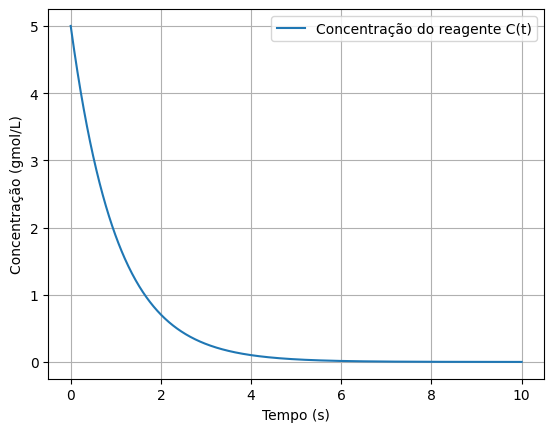

In [210]:
plt.plot(t, solucao[:, 0],
             label='Concentração do reagente C(t)') # plota o gráfico da concentração
plt.xlabel('Tempo (s)')
plt.ylabel('Concentração (gmol/L)')
plt.legend()
plt.grid()
plt.show()

Plota a temperatura:

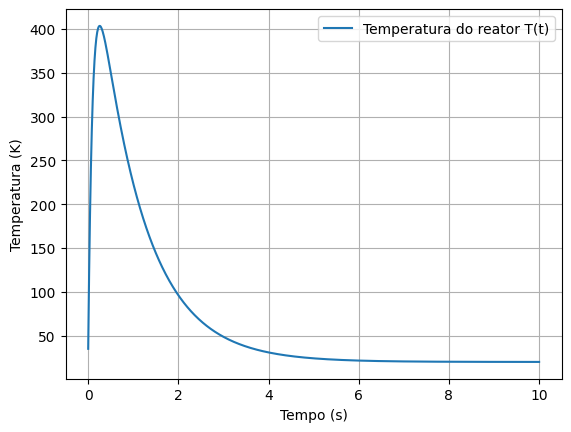

In [211]:
plt.plot(t, solucao[:, 1], label='Temperatura do reator T(t)') # plota o gráfico da temperatura
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend()
plt.grid()
plt.show()